In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [3]:
import pandas as pd

In [4]:
weather = pd.read_csv("Karlsruhe.csv", index_col='DATE')
weather.head()

,STATION,NAME,PRCP,SNWD,TMAX,TMIN
DATE,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29


In [5]:
weather.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP          1
SNWD       1684
TMAX          0
TMIN          0
dtype: int64

In [6]:
weather.shape

(19266, 6)

In [7]:
# Calculating null percentage

null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.000052
SNWD       0.087408
TMAX       0.000000
TMIN       0.000000
dtype: float64

In [8]:
# Removing columns with high null percentage

valid_columns = weather.columns[null_pct < .1]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [9]:
# Change weather dataset to valid column

weather = weather[valid_columns].copy()

In [10]:
# lowercase column names

weather.columns = weather.columns.str.lower()

In [11]:
weather

,station,name,prcp,snwd,tmax,tmin
DATE,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29
...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49


In [12]:
# Replacing missing values

weather = weather.ffill()

In [13]:
# Check for null values

weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [14]:
# Check datatypes

weather.dtypes

station     object
name        object
prcp       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [15]:
# check index

weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
       '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31'],
      dtype='object', name='DATE', length=19266)

In [16]:
# Convert index to Datetime

weather.index = pd.to_datetime(weather.index)

In [17]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', name='DATE', length=19266, freq=None)

In [18]:
# Counting unique value of years

weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    335
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    304
Name: DATE, dtype: int64

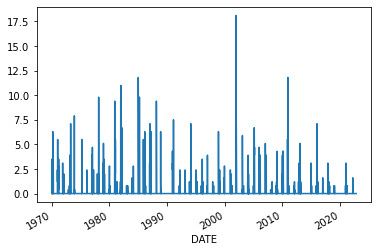

In [19]:
weather['snwd'].plot()

In [20]:
weather

,station,name,prcp,snwd,tmax,tmin
DATE,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29
...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49


In [21]:
# Creating a target column based on max temperature of next day

weather['target'] = weather.shift(-1)['tmax']
weather

,station,name,prcp,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22,30.0
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24,40.0
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29,39.0
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27,34.0
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29,31.0
...,...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47,75.0
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52,77.0
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49,73.0


In [22]:
# Replaing null value

weather = weather.ffill()
weather

,station,name,prcp,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22,30.0
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24,40.0
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29,39.0
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27,34.0
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29,31.0
...,...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47,75.0
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52,77.0
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49,73.0


In [23]:
weather.corr()

,prcp,snwd,tmax,tmin,target
prcp,1.000000,-0.013639,-0.014506,0.119140,-0.087361
snwd,-0.013639,1.000000,-0.305392,-0.314656,-0.288977
tmax,-0.014506,-0.305392,1.000000,0.867634,0.924709
tmin,0.119140,-0.314656,0.867634,1.000000,0.822489
target,-0.087361,-0.288977,0.924709,0.822489,1.000000


In [24]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [25]:
# create list of predictors
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snwd', 'tmax', 'tmin'], dtype='object')

In [26]:
# Time series cross validation

def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train['target'])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [27]:
# Make predictions by calling backtest function

predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,34.0,38.391566,4.391566
1979-12-31,35.0,36.909581,1.909581
1980-01-01,32.0,37.192426,5.192426
1980-01-02,32.0,34.974645,2.974645
1980-01-03,41.0,35.121009,5.878991
...,...,...,...
2022-10-27,75.0,71.038150,3.961850
2022-10-28,77.0,74.322454,2.677546
2022-10-29,73.0,75.430781,2.430781


In [28]:
# Checking mean absolute error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

4.520530918992429

### Improving Accuracy

In [29]:
def pct_diff(old, new):
  return (new - old) / old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
  for col in ["tmax", "tmin", "prcp"]:
      weather = compute_rolling(weather, horizon, col)

weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.02,0.4,28,22,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.04,0.4,30,24,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.05,0.0,40,29,39.0,32.666667,0.224490,25.000000,0.160000,0.036667,0.363636,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.54,0.4,39,27,34.0,36.333333,0.073394,26.666667,0.012500,0.210000,1.571429,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.37,2.8,34,29,31.0,37.666667,-0.097345,28.333333,0.023529,0.320000,0.156250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47,75.0,70.666667,0.018868,49.333333,-0.047297,0.006667,-1.000000,69.714286,0.032787,50.785714,-0.074543,0.233571,-1.000000
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52,77.0,72.666667,0.032110,50.000000,0.040000,0.006667,-1.000000,70.500000,0.063830,50.928571,0.021038,0.168571,-1.000000
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49,73.0,74.666667,0.031250,49.333333,-0.006757,0.000000,NaN,71.428571,0.078000,50.357143,-0.026950,0.152857,-1.000000


In [30]:
# Remove missing values

weather = weather.iloc[14:,:]
weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.11,1.2,35,27,42.0,32.666667,0.071429,27.000000,0.000000,0.036667,2.00,33.857143,0.033755,27.071429,-0.002639,0.120000,-0.083333
1970-01-16,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.09,0.0,42,34,44.0,36.000000,0.166667,29.333333,0.159091,0.066667,0.35,34.714286,0.209877,27.785714,0.223650,0.123571,-0.271676
1970-01-17,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,44,35,39.0,40.333333,0.090909,32.000000,0.093750,0.066667,-1.00,35.000000,0.257143,28.214286,0.240506,0.120000,-1.000000
1970-01-18,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,39,32,34.0,41.666667,-0.064000,33.666667,-0.049505,0.030000,-1.00,35.000000,0.114286,28.571429,0.120000,0.081429,-1.000000
1970-01-19,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,34,31,32.0,39.000000,-0.128205,32.666667,-0.051020,0.000000,NaN,35.000000,-0.028571,28.714286,0.079602,0.055000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47,75.0,70.666667,0.018868,49.333333,-0.047297,0.006667,-1.00,69.714286,0.032787,50.785714,-0.074543,0.233571,-1.000000
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52,77.0,72.666667,0.032110,50.000000,0.040000,0.006667,-1.00,70.500000,0.063830,50.928571,0.021038,0.168571,-1.000000
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49,73.0,74.666667,0.031250,49.333333,-0.006757,0.000000,NaN,71.428571,0.078000,50.357143,-0.026950,0.152857,-1.000000


In [31]:
weather = weather.fillna(0)

In [32]:
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.11,1.2,35,27,42.0,32.666667,0.071429,27.000000,...,27.071429,-0.002639,0.120000,-0.083333,35.000000,35.000000,27.000000,27.000000,0.110000,0.110000
1970-01-16,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.09,0.0,42,34,44.0,36.000000,0.166667,29.333333,...,27.785714,0.223650,0.123571,-0.271676,38.500000,42.000000,30.500000,34.000000,0.100000,0.090000
1970-01-17,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,44,35,39.0,40.333333,0.090909,32.000000,...,28.214286,0.240506,0.120000,-1.000000,40.333333,44.000000,32.000000,35.000000,0.066667,0.000000
1970-01-18,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,39,32,34.0,41.666667,-0.064000,33.666667,...,28.571429,0.120000,0.081429,-1.000000,40.000000,39.000000,32.000000,32.000000,0.050000,0.000000
1970-01-19,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,34,31,32.0,39.000000,-0.128205,32.666667,...,28.714286,0.079602,0.055000,-1.000000,38.800000,34.000000,31.800000,31.000000,0.040000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,72,47,75.0,70.666667,0.018868,49.333333,...,50.785714,-0.074543,0.233571,-1.000000,59.134838,56.245283,43.246492,40.849057,0.133429,0.082075
2022-10-28,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,75,52,77.0,72.666667,0.032110,50.000000,...,50.928571,0.021038,0.168571,-1.000000,59.144512,55.547170,43.251829,40.132075,0.133348,0.194906
2022-10-29,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,77,49,73.0,74.666667,0.031250,49.333333,...,50.357143,-0.026950,0.152857,-1.000000,59.155393,55.000000,43.255332,40.452830,0.133266,0.141132


In [33]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_prcp',
       'rolling_14_prcp_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [34]:
predictions = backtest(weather, rr, predictors)

In [35]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.292748519290724

In [36]:
# Checking biggest errors

predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2011-01-05,56.0,31.369988,24.630012
1983-11-24,56.0,32.677241,23.322759
1985-11-04,66.0,43.112120,22.887880
2021-12-22,54.0,33.484762,20.515238
2016-11-19,63.0,42.536864,20.463136
...,...,...,...
2016-01-04,46.0,46.003042,0.003042
2014-06-22,78.0,77.997736,0.002264
1999-07-04,82.0,81.998431,0.001569


In [37]:
# Checking reasons for big difference
weather.loc["2011-01-01":"2011-01-10"]

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2011-01-01,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.09,3.9,33,30,38.0,32.333333,0.020619,30.000000,...,26.142857,0.147541,0.170000,-0.470588,40.334148,39.275,29.202119,28.850,0.118443,0.11750
2011-01-02,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,5.1,38,26,36.0,34.666667,0.096154,28.666667,...,25.714286,0.011111,0.155000,-1.000000,40.332248,40.200,29.199511,28.350,0.118347,0.14525
2011-01-03,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,3.9,36,17,25.0,35.666667,0.009346,24.333333,...,24.642857,-0.310145,0.105714,-1.000000,40.328723,39.650,29.189585,29.725,0.118251,0.07400
2011-01-04,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,3.1,25,15,33.0,33.000000,-0.242424,19.333333,...,23.428571,-0.359756,0.092143,-1.000000,40.316260,39.775,29.178049,28.200,0.118154,0.09825
2011-01-05,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.21,2.4,33,12,56.0,31.333333,0.053191,14.666667,...,21.857143,-0.450980,0.103571,1.027586,40.310317,39.875,29.164094,29.225,0.118229,0.15975
2011-01-06,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.14,1.6,56,24,56.0,38.000000,0.473684,17.000000,...,21.071429,0.138983,0.110714,0.264516,40.323052,40.625,29.159903,28.300,0.118247,0.08975
2011-01-07,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.72,0.0,56,43,60.0,48.333333,0.158621,26.333333,...,22.285714,0.929487,0.095000,6.578947,40.335766,39.525,29.171127,28.850,0.118735,0.14900
2011-01-08,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.00,0.0,60,45,59.0,57.333333,0.046512,37.333333,...,24.714286,0.820809,0.090000,-1.000000,40.351702,40.150,29.183955,29.000,0.118639,0.07350
2011-01-09,GME00124498,"BADEN BADEN GEROLDSAU, GM",0.80,0.0,59,39,39.0,58.333333,0.011429,42.333333,...,27.071429,0.440633,0.142143,4.628141,40.366802,39.650,29.191903,29.575,0.119190,0.13925


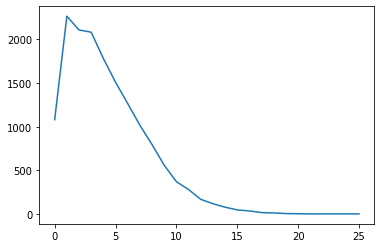

In [38]:
# Showing the errors

(predictions["diff"]).round().value_counts().sort_index().plot()